# 7.1 Logistic Regression

Before using logistic regression to model our data, we will attempt to do so through simple linear regression. While linear regression is not suitable for dichotomous outcomes, visualizing it can help illustrate why logistic regression is a better fit for our research question.

## Why Not Linear Regression?

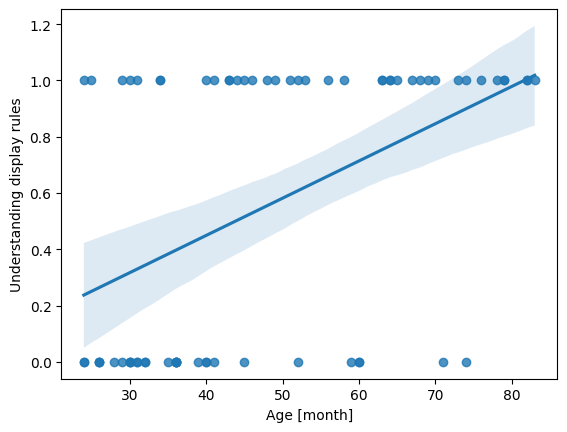

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/data.dat", delimiter='\t')

fig, ax = plt.subplots()
sns.regplot(x="age", y="display", data=df, ax=ax)
ax.set(xlabel="Age [month]", ylabel="Understanding display rules")

plt.show()

As you can see, linear regression struggles with binary outcomes, as evidenced by predicted values exceeding 1 beyond approximately 80 months, which is invalid for probabilities. Since our dependent variable is dichotomous (e.g., pass/fail), we need a model that restricts predicted values to fall between 0 and 1, such as logistic regression.


## Logistic Regression

Logistic regression naturally ensures that predicted probabilities stay between 0 and 1. In this tutorial, we will use the `LogisticRegression()` class from `scikit-learn` for modeling.

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Convert 'age' into a NumPy array and reshape it to a 2D array (required for the model)
# .reshape(-1, 1): Creates one column with as many rows as needed (-1 infers the row count)
X = np.asarray(df['age']).reshape(-1, 1)

# Convert 'display' to a NumPy array for the binary outcome
y = np.asarray(df['display']) # binary outcome

model = LogisticRegression()
results = model.fit(X, y)

print(f"Intercept: {results.intercept_}")
print(f"Coefficients: {results.coef_}")

Intercept: [-2.83306013]
Coefficients: [[0.06612023]]


### Interpreting the Model Outputs: Logits

The interpretation of the model coefficients is analogous to linear regression:
- **Intercept:** The expected logit (log-odds) of the outcome (understanding display rules) when age = 0.
- **Coefficient:** The logit increase of understanding display rules for each one-month increase in age.

The output of a logistic regression model is linear in the log-odds (logits). Each coefficient in the logistic regression tells us how a one-unit change in a predictor affects the log-odds of the outcome. While not as intuitive as probabilities, the transformation to logits is crucial because it allows us to use linear regression techniques for binary outcomes. 

**But what even are logits?**

Logits are the natural logarithm of the odds of an event occurring in logistic regression. The odds of an event are defined as the ratio of the probability of the event occurring ($P$) to the probability of the event not occurring $(1-P)$:

$$\text{Odds} = \frac{P}{1-P}$$

In logistic regression, we predict the logit (log-odds) as a linear combination of the independent variables 
$(X_1, X_2, \dots, X_k)$ and their corresponding regression coefficients $(\beta_1, \beta_2, \dots \beta_k)$:

$$\text{Logit}(P) = \ln\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_kX_k$$

If we plot the equation, we can see how the regression line looks like:

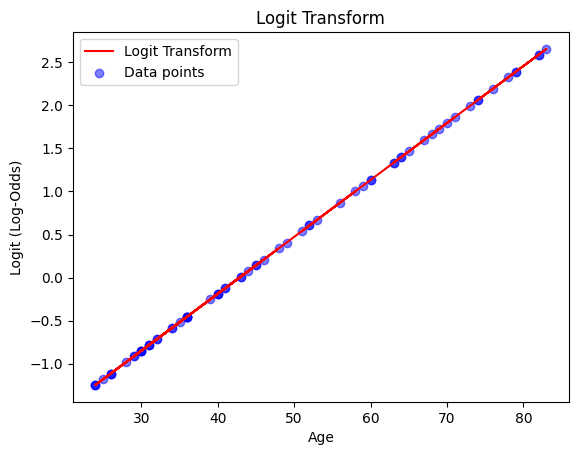

In [3]:
df['logit'] = results.intercept_ + results.coef_[0] * df['age']

fig, ax = plt.subplots()
ax.plot(df['age'], df['logit'], color="red", label="Logit Transform")
ax.scatter(df['age'], df['logit'], color="blue", alpha=0.5, label="Data points")
ax.set(xlabel="Age", ylabel="Logit (Log-Odds)", title="Logit Transform")

plt.legend()
plt.show()

### From Logits to Probabilities

We can simply transform the logits back into probabilities (more specifically the conditional probability of an observation y belongig to class 1 given predictor(s) X):

$$P(Y=1 \mid X) = \frac{1}{1 + e^{-(b_0 + b_1 X)}}$$

To better understand the model's behavior, let’s plot its outputs. A simple way to do this is by ceating an evenly spaced array of values for our range, and then use `model.predict()` to predict the outcome for each value. This will generate the regression line:

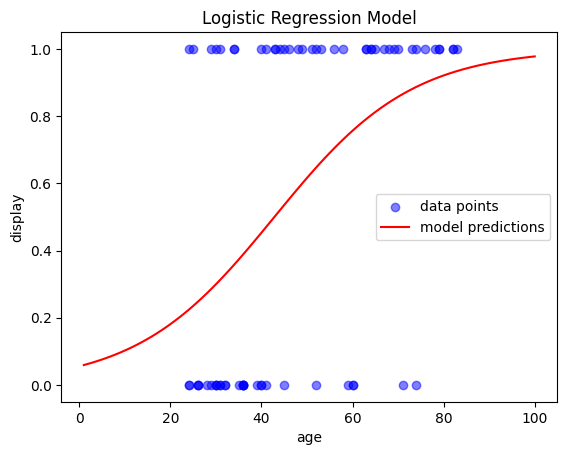

In [4]:
# Create an evenly spaced array of values for the range 
x_range = np.linspace(1, 100, 100).reshape(-1, 1) 

# Predict probability of class 1 for each value in the range
y_prob = model.predict_proba(x_range)
y_prob = y_prob[:,1] # only get the second column

# Plot the results
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='data points', alpha=0.5)   # actual data
ax.plot(x_range, y_prob, color='red', label='model predictions') # regression model
ax.set(xlabel='age', ylabel='display', title='Logistic Regression Model')

plt.legend()
plt.show()